In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deepglobe-road-extraction-dataset/class_dict.csv
/kaggle/input/deepglobe-road-extraction-dataset/metadata.csv
/kaggle/input/deepglobe-road-extraction-dataset/valid/704062_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/235424_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/59598_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/156684_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/993402_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/373475_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/791459_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/407466_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/504054_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/832447_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/868508_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/valid/685013_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/v

# IMPORTS

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
meta_data = pd.read_csv('/kaggle/input/deepglobe-road-extraction-dataset/metadata.csv')

In [5]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8570 entries, 0 to 8569
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_id        8570 non-null   int64 
 1   split           8570 non-null   object
 2   sat_image_path  8570 non-null   object
 3   mask_path       6226 non-null   object
dtypes: int64(1), object(3)
memory usage: 267.9+ KB


In [6]:
meta_data.head(3)

,image_id,split,sat_image_path,mask_path
0,100034,train,train/100034_sat.jpg,train/100034_mask.png
1,100081,train,train/100081_sat.jpg,train/100081_mask.png
2,100129,train,train/100129_sat.jpg,train/100129_mask.png


# PREPROCESSING AND LOADING IMAGES

### Loading Paths

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
meta_data["split"].value_counts()

split
train    6226
valid    1243
test     1101
Name: count, dtype: int64

TRAIN = meta_data[meta_data["split"] == "train"]
TEST = meta_data[meta_data["split"] == "test"]
VAL = meta_data[meta_data["split"] == "valid"]
TRAIN.shape, TEST.shape, VAL.shape

train_sat_paths = []
train_mask_paths = []

for img, mask in zip(TRAIN["sat_image_path"], TRAIN["mask_path"]):
    x = '/kaggle/input/deepglobe-road-extraction-dataset/' + img
    y = '/kaggle/input/deepglobe-road-extraction-dataset/' + mask
    train_sat_paths.append(x)
    train_mask_paths.append(y)

print(len(train_sat_paths), len(train_mask_paths))
print(train_sat_paths[100])
print(train_mask_paths[100])

In [9]:
TRAIN = meta_data[meta_data["split"] == "train"]
TEST = meta_data[meta_data["split"] == "test"]
VAL = meta_data[meta_data["split"] == "valid"]
train_sat_paths = []
train_mask_paths = []

for img, mask in zip(TRAIN["sat_image_path"], TRAIN["mask_path"]):
    x = '/kaggle/input/deepglobe-road-extraction-dataset/' + img
    y = '/kaggle/input/deepglobe-road-extraction-dataset/' + mask
    train_sat_paths.append(x)
    train_mask_paths.append(y)


(1024, 1024)

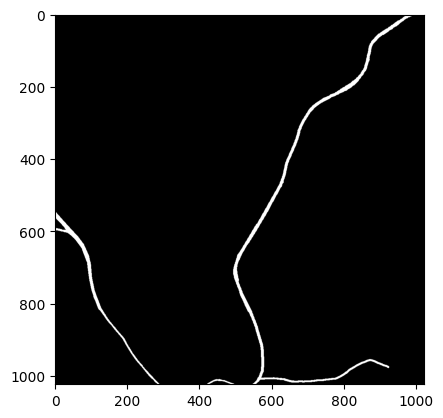

In [10]:
imag = cv.imread(train_mask_paths[0],0)
plt.imshow(imag, cmap = "gray")
imag.shape

In [11]:
def load_image(image_paths, mask = False):
    images = []
    c = 1;
    for img in image_paths:
        if c== 2501:
            break
        if not mask:
            image = cv.imread(img)
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        else:
            image = cv.imread(img, 0)
        image = cv.resize(image, dsize = (256,256))
        images.append(image)
        print("NUMBER = ", c)
        c = c+1
    return np.array(images)/255.0

In [12]:
sat_images = load_image(train_sat_paths)
np.save('sat_train_arrays.npy', sat_images)
mask_images = load_image(train_mask_paths, mask = True)
np.save('mask_train_arrays.npy', mask_images)

NUMBER =  1
NUMBER =  2
NUMBER =  3
NUMBER =  4
NUMBER =  5
NUMBER =  6
NUMBER =  7
NUMBER =  8
NUMBER =  9
NUMBER =  10
NUMBER =  11
NUMBER =  12
NUMBER =  13
NUMBER =  14
NUMBER =  15
NUMBER =  16
NUMBER =  17
NUMBER =  18
NUMBER =  19
NUMBER =  20
NUMBER =  21
NUMBER =  22
NUMBER =  23
NUMBER =  24
NUMBER =  25
NUMBER =  26
NUMBER =  27
NUMBER =  28
NUMBER =  29
NUMBER =  30
NUMBER =  31
NUMBER =  32
NUMBER =  33
NUMBER =  34
NUMBER =  35
NUMBER =  36
NUMBER =  37
NUMBER =  38
NUMBER =  39
NUMBER =  40
NUMBER =  41
NUMBER =  42
NUMBER =  43
NUMBER =  44
NUMBER =  45
NUMBER =  46
NUMBER =  47
NUMBER =  48
NUMBER =  49
NUMBER =  50
NUMBER =  51
NUMBER =  52
NUMBER =  53
NUMBER =  54
NUMBER =  55
NUMBER =  56
NUMBER =  57
NUMBER =  58
NUMBER =  59
NUMBER =  60
NUMBER =  61
NUMBER =  62
NUMBER =  63
NUMBER =  64
NUMBER =  65
NUMBER =  66
NUMBER =  67
NUMBER =  68
NUMBER =  69
NUMBER =  70
NUMBER =  71
NUMBER =  72
NUMBER =  73
NUMBER =  74
NUMBER =  75
NUMBER =  76
NUMBER =  77
NUMBER =

In [13]:
#mask_images = np.load('/kaggle/working/mask_train_arrays.npy')
#sat_images = np.load('/kaggle/working/sat_train_arrays.npy')
#print(sat_images.shape, mask_images.shape)

In [17]:
sat_images.shape, mask_images.shape

((2500, 256, 256, 3), (2500, 256, 256))

# ---------------------------------------------------------

# TRAIN AND TEST

In [18]:
import random
import tensorflow as tf
np.random.seed(10)
tf.random.set_seed(10)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(sat_images, mask_images,test_size = 0.25, random_state = 10)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1875, 256, 256, 3) (1875, 256, 256)
(625, 256, 256, 3) (625, 256, 256)


# UNET

In [21]:
tf.compat.v1.reset_default_graph()

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Dropout, Concatenate, MaxPooling2D, Dense, concatenate
from tensorflow.keras import Input, Model

In [23]:
def convBlock(inp_layer, n_filter, dropout = 0, max_pooling = True):
    x = Conv2D(n_filter, kernel_size = (3,3), padding = "same", activation = "relu", name = f"sada_unetConv1{n_filter}")(inp_layer)
    x = Conv2D(n_filter, kernel_size = (3,3), padding = "same", activation = "relu", name = f"sada_unetConv2{n_filter}")(x)
    
    if dropout>0:
        x = Dropout(dropout, name = f"sada_unetDrop{n_filter}")(x)
        
    skip = x
    
    if max_pooling:
        next_layer = MaxPooling2D(name = f"sada_unetmxp{n_filter}")(x)
    else:
        next_layer = x

    return next_layer, skip    

In [24]:
def upBlock(prev_input, skip_input, n_filters):
    up = Conv2DTranspose(n_filters, kernel_size=(3, 3), strides=2, padding="same", name = f"sada_unetT{n_filters}")(prev_input)
    x = concatenate([up,skip_input], axis = 3, name =  f"sada_unet_merge{n_filters}")
    x = Conv2D(n_filters, kernel_size = (3,3), padding = "same", activation = "relu",name = f"sada_unetconvA{n_filters}")(x)
    x = Conv2D(n_filters, kernel_size = (3,3), padding = "same", activation = "relu",name = f"sada_unetconB{n_filters}")(x)
    
    return x

In [25]:
def UNET(input_shape = (256,256,3), n_filters = 64):
    
    # encoder
    inputs = Input(shape = input_shape)
    c1, s1 = convBlock(inputs, n_filters)
    c2, s2 = convBlock(c1, n_filters*2)
    c3, s3 = convBlock(c2, n_filters*4)
    c4, s4 = convBlock(c3, n_filters*8)
    
    # bottleneck
    c5,_ = convBlock(c4, n_filters*16, dropout = 0.3, max_pooling = False)
    
    # decoder
    u6 = upBlock(c5, s4, n_filters*8)
    u7 = upBlock(u6, s3, n_filters*4)
    u8 = upBlock(u7, s2, n_filters*2)
    u9 = upBlock(u8, s1, n_filters)
    
    x = Conv2D(1, 1, padding="same", activation="sigmoid", name="final_conv")(u9)
    
    unet_model = Model(inputs = inputs, outputs = x)
    
    return unet_model 

In [27]:
import tensorflow as tf
from tensorflow.keras import backend as K

def iou_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersection
    iou = intersection / (union + K.epsilon())
    return iou

## importing my trained UNET, which was trained in the previous version(for 40 epochs)

In [28]:
only_unet = tf.keras.models.load_model("/kaggle/input/unet-trained-for-40epochs/only_unet_40Epochs.h5")

In [29]:
print(only_unet.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv164    │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv264    │ (None, 256, 256,  │     36,928 │ sada_unetConv164… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetmxp64      │ (None, 128, 128,  │          0 │ sada_unetConv264… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv1128   │ (None, 128, 128,  │     73,856 │ sada_unetmxp64[0… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv2128   │ (None, 128, 128,  │    147,584 │ sada_unetConv112… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetmxp128     │ (None, 64, 64,    │          0 │ sada_unetConv212… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv1256   │ (None, 64, 64,    │    295,168 │ sada_unetmxp128[… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv2256   │ (None, 64, 64,    │    590,080 │ sada_unetConv125… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetmxp256     │ (None, 32, 32,    │          0 │ sada_unetConv225… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv1512   │ (None, 32, 32,    │  1,180,160 │ sada_unetmxp256[… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv2512   │ (None, 32, 32,    │  2,359,808 │ sada_unetConv151… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetmxp512     │ (None, 16, 16,    │          0 │ sada_unetConv251… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv11024  │ (None, 16, 16,    │  4,719,616 │ sada_unetmxp512[… │
│ (Conv2D)            │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetConv21024  │ (None, 16, 16,    │  9,438,208 │ sada_unetConv110… │
│ (Conv2D)            │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetDrop1024   │ (None, 16, 16,    │          0 │ sada_unetConv210… │
│ (Dropout)           │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sada_unetT512       │ (None, 32, 32,    │  4,719,104 │ sada_unetDrop102

 Total params: 34,513,347 (131.66 MB)

 Trainable params: 34,513,345 (131.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [30]:
def postprocess_masks(pred_masks):
    pred_masks = (pred_masks > 0.5).astype(np.uint8)  # Apply threshold
    pred_masks_squeezed = np.squeeze(pred_masks, axis=-1)  # Remove the last dimension
    return pred_masks_squeezed

## Predictions with ONLY_UNET

In [39]:
y_pred = only_unet.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step


In [40]:
y_pred = postprocess_masks(y_pred)
y_pred.shape

(625, 256, 256)

### VISUALIZE UNET RESULTS

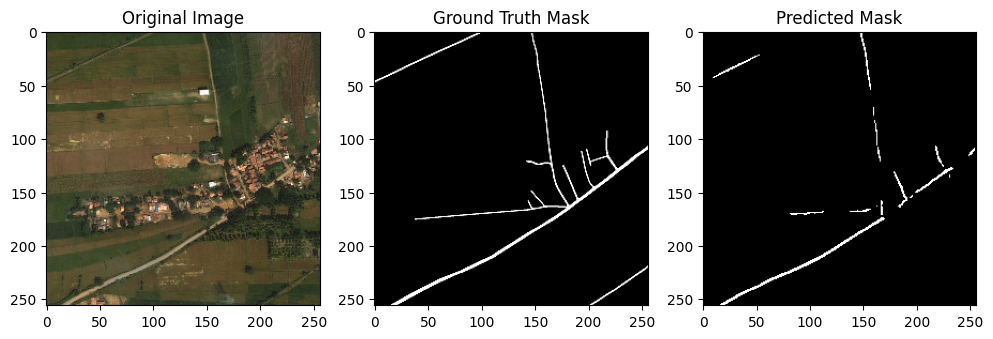

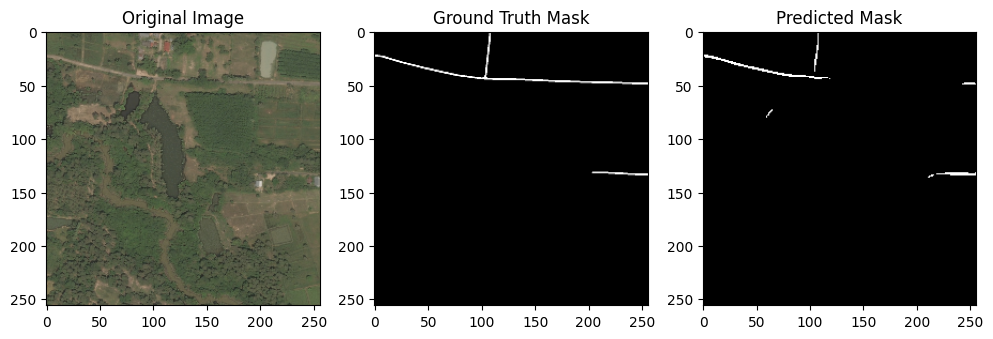

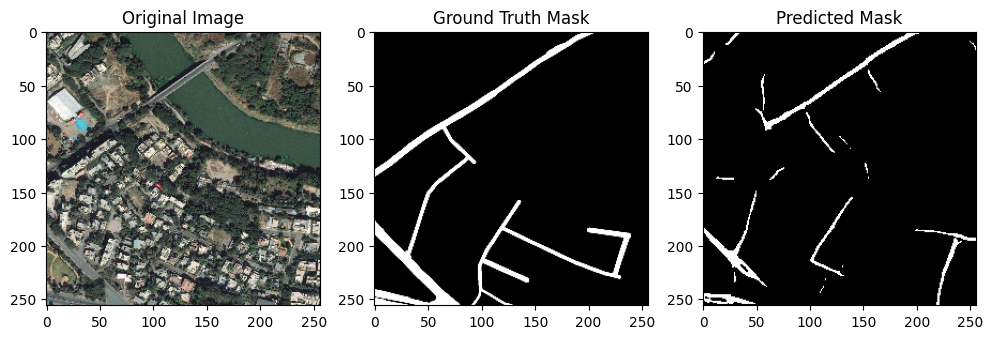

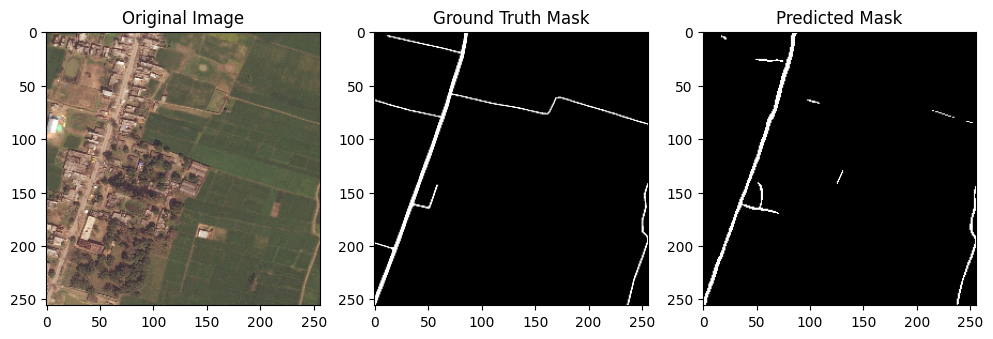

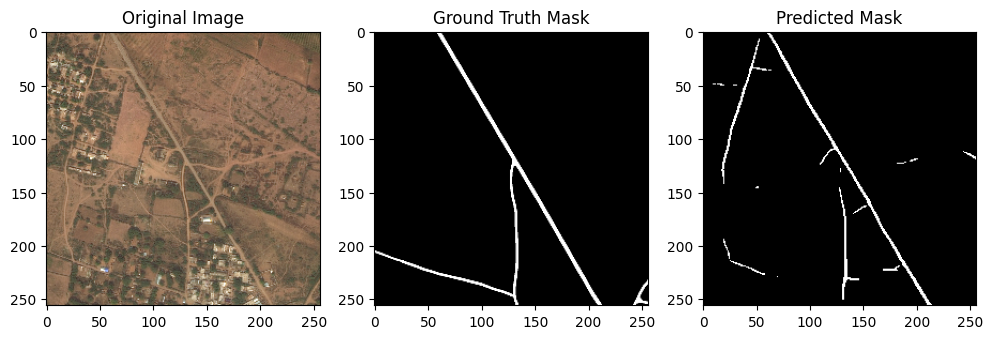

In [41]:
def visualize_results(x_test, y_test, y_pred, num_samples=5):
    indices = random.sample(range(len(x_test)), num_samples)
    for i in indices:
        plt.figure(figsize=(12, 4))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(x_test[i])
        plt.title('Original Image')
        
        # Ground truth mask
        plt.subplot(1, 3, 2)
        plt.imshow(y_test[i].reshape(256, 256), cmap='gray')
        plt.title('Ground Truth Mask')
        
        # Predicted mask
        plt.subplot(1, 3, 3)
        plt.imshow(y_pred[i].reshape(256, 256), cmap='gray')
        plt.title('Predicted Mask')
        
        plt.show()

# Visualize random results
visualize_results(x_test, y_test, y_pred, num_samples=5)

### IOU SCORE and DICE COEFFECIENT FOR ONLY UNET

In [42]:
from sklearn.metrics import jaccard_score

def calculate_iou(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    return jaccard_score(y_true, y_pred, average='binary')

In [46]:
ious = [calculate_iou(y_te, y_pr) for y_te, y_pr in zip(np.array(y_test).astype(np.uint8), y_pred)]
average_iou = np.mean(ious)
print("Average IoU:", average_iou)

Average IoU: 0.4208864741604095


In [47]:
def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    
    dice = (2. * intersection + tf.keras.backend.epsilon()) / (union + tf.keras.backend.epsilon())
    
    return dice

In [48]:
dices = [dice_coefficient(y_te, y_pr) for y_te, y_pr in zip(np.array(y_test).astype(np.uint8), y_pred)]
average_dice = np.mean(dices)
print("Average DICE:", average_dice)

Average DICE: 0.5695682


# RESULT (ONLY UNET- 40 EPOCHS) - 
### Average DICE: 0.5695682
### Average IoU: 0.42088647

# ------------------------------------------------------------------------